In [ ]:
import numpy as np
import pandas as pd
from  scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#generate distribution
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))


In [ ]:
popages=pd.dataframe(population_ages)
popages

,Age
0,60
1,40
2,49
3,49
4,44
...,...
249995,25
249996,29
249997,24
249998,28


In [11]:
popmean=sum(popages['Age'])/len(popages)
print(popmean)
popages.describe()

42.985332


,Age
count,250000.000000
mean,42.985332
std,13.211628
min,18.000000
25%,29.000000
50%,47.000000
75%,54.000000
max,84.000000


(array([1.2884e+04, 7.3599e+04, 1.3532e+04, 1.0686e+04, 4.1189e+04,
        6.5358e+04, 2.8330e+04, 4.0270e+03, 3.7700e+02, 1.8000e+01]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

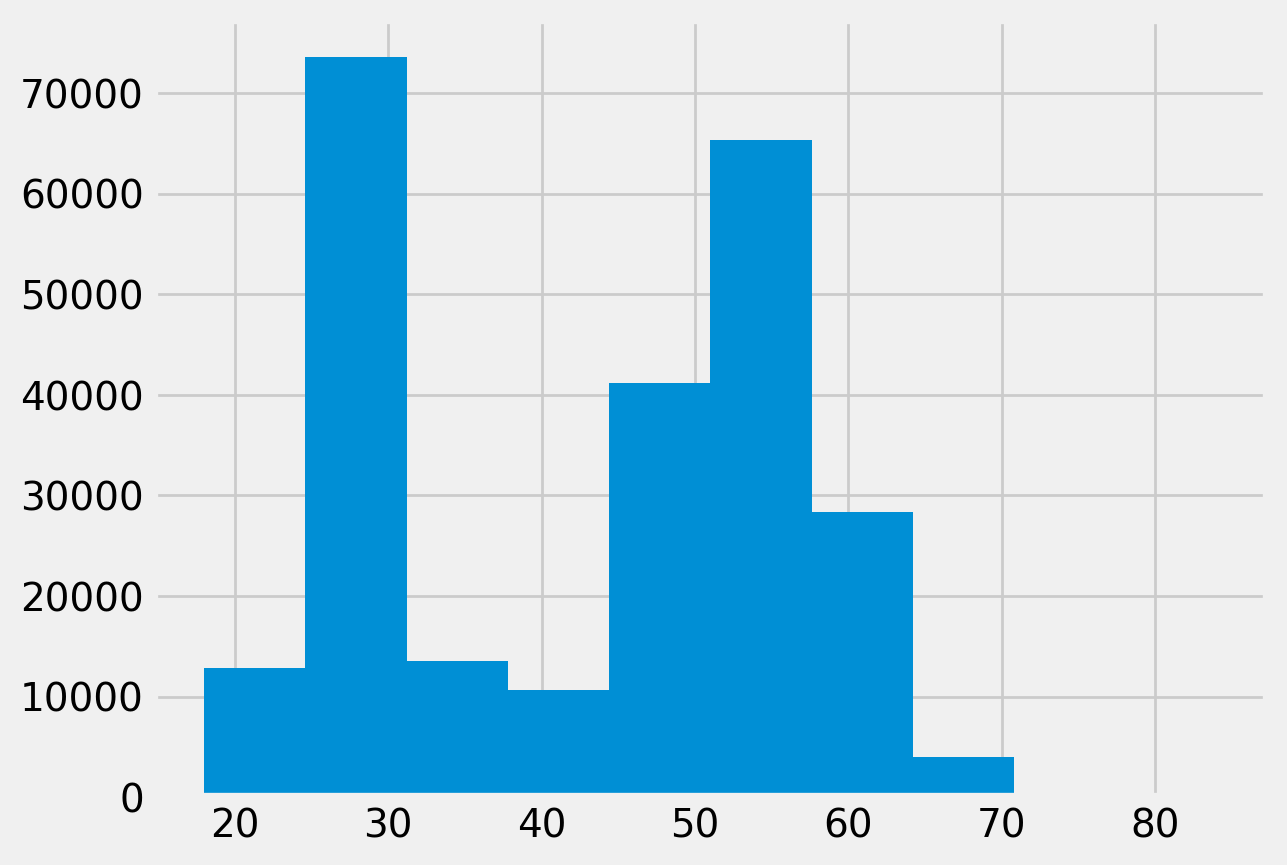

In [13]:
plt.hist(popages)

In [15]:
sample =popages.sample(n=500,random_state=5)
print(sample.mean())
print(sample.std())


Age    41.832
dtype: float64
Age    13.163218
dtype: float64


In [17]:
sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]
chol_levels=np.array(sample_chol_levels)
chol_levels

array([ 66.,  36.,  73.,  48.,  81.,  69.,  75.,  81.,  73.,  69., 101.,
        70.,  50.,  42.,  36.,  71.,  65.,  43.,  76.,  24.])

In [29]:
chol_levels_mean = np.mean(chol_levels)
chol_levels_mean


np.float64(62.45)

In [30]:
chol_levels_std=np.std(chol_levels,ddof=1)
chol_levels_std

np.float64(19.209304214912432)

In [27]:
chol_levels_se=chol_levels_std/np.sqrt(len(sample_chol_levels))
chol_levels_se

np.float64(4.295331002501743)

In [33]:
#confidence interval 
ct = stats.t.interval(confidence=0.95, df=len(sample_chol_levels)-1, loc=chol_levels_mean, scale=chol_levels_se)
ct

(np.float64(53.4597688901183), np.float64(71.44023110988171))

In [35]:
#weight of people. 10 values between 55 and 75
weights= np.random.uniform(55,75,10)
weights

array([63.07230327, 64.485037  , 62.4273356 , 59.23842135, 74.52549947,
       55.8338301 , 66.3563626 , 71.83560337, 66.20362332, 60.07784728])

In [36]:
weights_mean=np.mean(weights)
weights_mean

np.float64(64.40558633750048)

In [37]:
weights_std=np.std(weights,ddof=1)
weights_std

np.float64(5.669191755833846)

In [38]:
weights_se=weights_std/np.sqrt(len(weights))
weights_se

np.float64(1.792755844068412)

In [39]:
confidence_interval = stats.t.interval(confidence=0.95, df=len(weights)-1, loc=weights_mean, scale=weights_se)
confidence_interval

(np.float64(60.35009086359258), np.float64(68.46108181140838))

In [48]:

data = pd.read_csv(r'tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [55]:
sample_data=data.sample(n=100, random_state=34)


In [56]:
sample_data['Age']=sample_data['Age'].fillna(sample_data['Age'].median())

sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 131 to 142
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          100 non-null    float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        30 non-null     object 
 11  Embarked     100 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.2+ KB


In [57]:
age= sample_data['Age']

In [58]:
#population mean
mu= data['Age'].mean()
mu

np.float64(30.272590361445783)

In [60]:
xbar=age.mean()
xbar

np.float64(30.6992)

In [61]:
sd=np.std(age,ddof=1)
sd

np.float64(13.329074447093527)

In [62]:
se=sd/np.sqrt(len(age))
se

np.float64(1.3329074447093527)

In [67]:
age_confidenceinterval = stats.t.interval(confidence=0.95, df=len(age)-1, loc=xbar, scale=se)
age_confidenceinterval

(np.float64(28.054422453415583), np.float64(33.34397754658442))